In [1]:
import cv2
from math import ceil
import numpy as np
from skimage.color import rgb2gray, rgba2rgb, label2rgb
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import ndimage
from src.preprocessing import process_video
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Open the video file
video = cv2.VideoCapture('images/cheese_gel.avi')

In [3]:
length, height, width = int(video.get(cv2.CAP_PROP_FRAME_COUNT)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
print( length )
skip_size = 1

frames = np.zeros(shape=(ceil(length / skip_size), height, width))
frame_count = 0

while True:
    ret, frame = video.read()

    if not ret:
        break

    if frame_count % skip_size == 0:
        im = rgb2gray(frame)
        frames[ceil(frame_count / skip_size)] = im

    frame_count += 1

video.release()

print(frames.shape)
# print(ceil(length / skip_size))

240
(240, 1002, 1004)


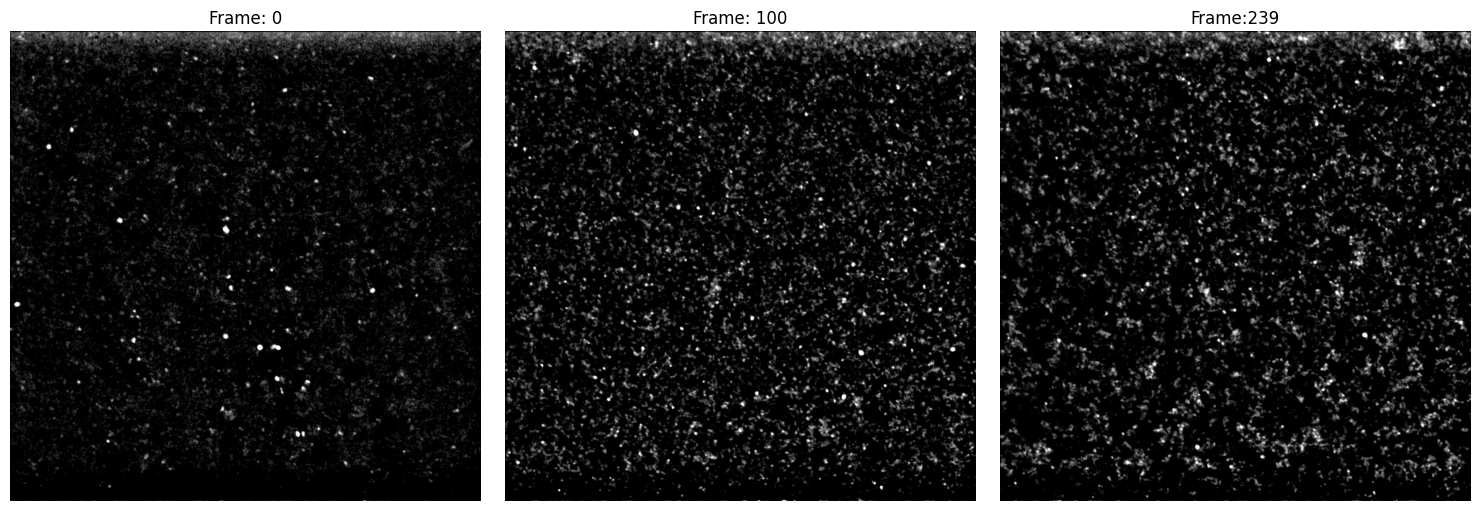

In [4]:

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(frames[0])
ax[0].set_title('Frame: 0')
ax[0].axis('off')
ax[1].imshow(frames[100])
ax[1].set_title('Frame: 100')
ax[1].axis('off')
ax[2].imshow(frames[239])
ax[2].set_title('Frame:239')
ax[2].axis('off')
plt.tight_layout()
plt.show()

In [5]:
label_video = process_video('images/cheese_gel.avi', threshold=0.2, skip_size=8)

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1, 1, 2]})
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()

for label_image in label_video:
    L = 100 # Maximum distances to consider
    M = label_image.shape[0] - L


    label_image_bounded = np.zeros(label_image.shape, dtype=int)
    cluster_num = 1
    for region in regionprops(label_image):
        minr, minc, maxr, maxc = region.bbox
        # rect = patches.Rectangle((minr, minc), (maxr - minr),(maxc - minc), color='red')
        # ax[3].add_patch(rect)
        if (minr > L+1) and (minc > L+1) and (maxr < M-1) and (maxc < M-1):
            # print(region.bbox)
            # print('ja')
            pixel_coordinates = region.coords
            label_image_bounded[pixel_coordinates[:,0],  pixel_coordinates[:,1]] =  cluster_num
            cluster_num += 1
    bx = (L, M, M, L, L)
    by = (L, L, M, M, L)
    ax[3].plot(bx, by, '-r')
    ax[3].imshow(label2rgb(label_image, bg_label=0))
    curr_image = label_image_bounded

    F = np.zeros(L+1)
    G = np.zeros(L+1)
    for cluster in range(1, curr_image.max()+1):
        ref_cluster = curr_image == cluster
        rem_clusters = label_image * np.invert(ref_cluster)
        
        D = ndimage.distance_transform_edt(ref_cluster==0)
        f = np.zeros(L+1)
        g = np.zeros(L+1)
        for i in range(0,L+1):
            K = D <= i
            f[i] = np.count_nonzero(K*rem_clusters)
            g[i] = np.count_nonzero(K)
            # if (i%10==0):
            #     ax[3].contour(K)
            #     display(fig)
            #     clear_output(wait = True) 
            

    display(fig)
    clear_output(wait = True)
plt.show()

In [6]:
# To create singualar pictures

# Initialize a frame counter
# frame_count = 0

# # Loop through each frame of the video
# while True:
#     # Read the next frame from the video
#     ret, frame = video.read()

#     # If there are no more frames, break out of the loop
#     if not ret:
#         brea

#     # Save the current frame as an image file
#     filename = f'frame_{frame_count:04d}.tif'  # Format the filename with a four-digit frame number
#     # cv2.imwrite(filename, frame)

#     # Increment the frame counter
#     frame_count += 1

# # Release the video file
# video.release()


In [7]:
# def process_video(path, threshold=None, skip_size=1):
#     video = cv2.VideoCapture(path)

#     frames = []
#     frame_count = 0

#     while True:
#         ret, frame = video.read()

#         if not ret:
#             break

#         if frame_count % skip_size == 0:
#             im = rgb2gray(frame)
#             frames.append(im)

#     video.release()

#     frames_array = np.array(frames)

#     print(frames_array.shape)
